# Computational Methods in Physics (FIS810)
# UFPE - PPGFIS

## Week 9 - Monte Carlo for Statistical Physics

In [55]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import random
from IPython import display
from time import sleep
from scipy.ndimage import convolve, generate_binary_structure

# Plotting style

plt.style.use('science')
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['font.size'] = 15
plt.rcParams['text.usetex'] = True

# Metropolis Algorithm

\begin{equation}
E = -J\sum_{<i,j>} s_i s_j - B \sum_i s_i
\end{equation}

\begin{equation}
\Delta E_i/J = \left(-\sum_{<i,j>} (-s_i) s_j - \frac{B}{J} (-s_i) \right) - \left(-\sum_{<i,j>} s_i s_j - \frac{B}{J} s_i \right) = 2 \left(\sum_{<i,j>} s_i s_j + \frac{B}{J} s_i \right)
\end{equation}

In [56]:
def calculate_dE(s, i, j, B):
    """Get neighbors and calculate dE when flipping i,j spin of state s. B is B/J and dE is dE/J."""
    top, bottom, left, right = 0, 0, 0, 0
    
    # Get neighbors using PBC
    
    top = s[i-1,j]
    left = s[i,j-1]
    
    if i == N-1: 
        bottom = s[0,j]
    else:
        bottom = s[i+1,j]
    
    if j == N-1: 
        right = s[i,0]
    else:
        right = s[i,j+1]
    
    return 2*s[i,j]*(top+bottom+left+right) + 2*B*s[i,j]

In [57]:
def get_energy(s, B):
    """Get interaction energy using convolution and PBC."""
    kernel = generate_binary_structure(2,1)
    kernel[1,1] = False
    interaction_energy = np.sum(-s*convolve(s, kernel, mode='wrap'))
    field_energy = B*np.sum(s)
    return interaction_energy + field_energy

In [58]:
def metropolis(s, N, T, B, steps):
    """Metropolis algorithm. Returns total energy and spin."""
    s_list = []
    E_list = []

    E = get_energy(s, B)

    for mcs in range(steps):
        # Select a random spin
        i, j = np.random.randint(low=0, high=N, size=2)

        # Check energy difference  
        dE = calculate_dE(s, i, j, B)

        if dE <= 0:
            s[i,j] = -1*s[i,j]
            E = E + dE
        else:
            if np.random.random() < np.exp(-dE/T):
                s[i,j] = -1*s[i,j]
                E = E + dE

        E_list.append(E)
        s_list.append(np.sum(s))
        
    return np.array(E_list), np.array(s_list)

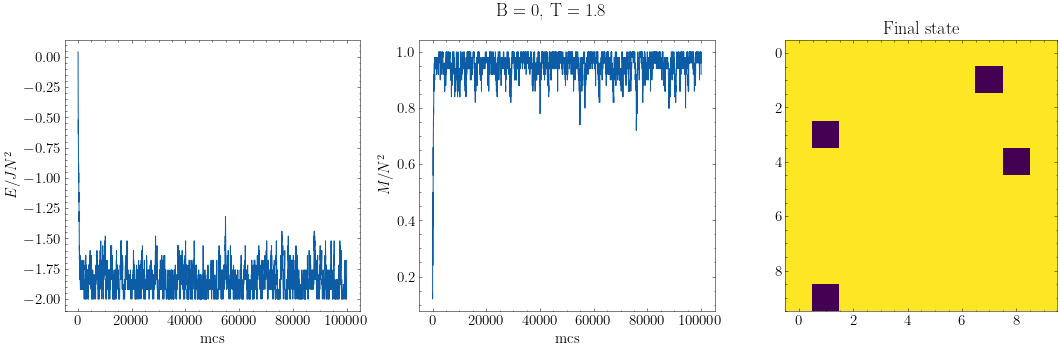

In [95]:
# 10x10 spins, random initial state, B = 0, T = 1.8, 100000 mcs

N = 10
T = 1.8
B = 0
s = np.random.choice([-1,+1], (N,N))
steps = 100000

E_array, s_array = metropolis(s, N, T, B, steps)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(E_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$E/JN^2$')

plt.subplot(1,3,2)
plt.plot(s_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$M/N^2$')

plt.subplot(1,3,3)
plt.imshow(s)
plt.title('Final state')

plt.suptitle('B = 0, T = 1.8')

plt.show()

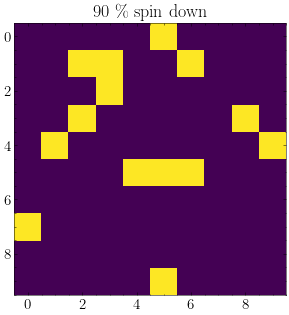

In [100]:
# Controlling the initial state

s = np.random.random(size=(N,N))
s[s > 0.9] = 1
s[s < 0.9] = -1
s = s.astype('int64')

plt.imshow(s)
plt.title("90 \% spin down")
plt.show()

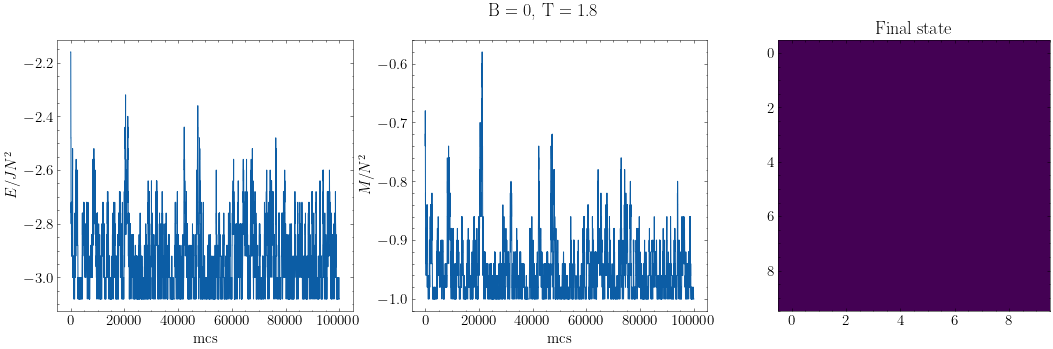

In [101]:
# 10x10 spins, controled initial state, B = 0, T = 1.8, 100000 mcs

N = 10
T = 1.8
B = 0
steps = 100000

E_array, s_array = metropolis(s, N, T, B, steps)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(E_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$E/JN^2$')

plt.subplot(1,3,2)
plt.plot(s_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$M/N^2$')

plt.subplot(1,3,3)
plt.imshow(s)
plt.title('Final state')

plt.suptitle('B = 0, T = 1.8')

plt.show()

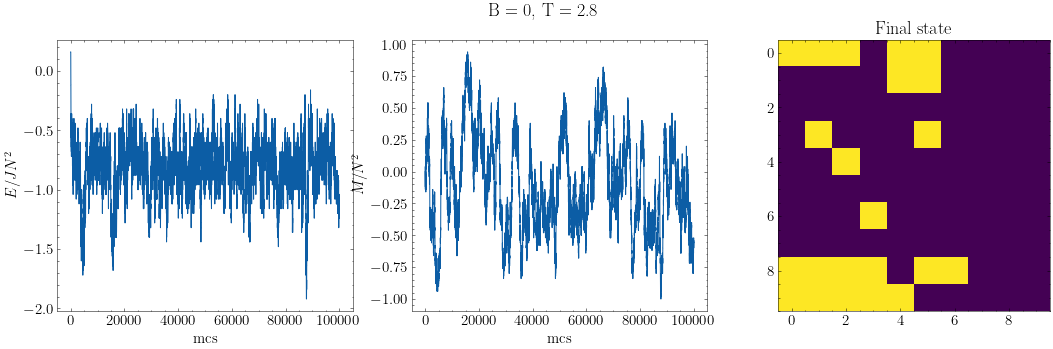

In [12]:
# 10x10 spins, random initial state, B = 0, T = 2.8, 100000 mcs

N = 10
T = 2.8
B = 0
s = np.random.choice([-1,+1], (N,N))
steps = 100000

E_array, s_array = metropolis(s, N, T, B, steps)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(E_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$E/JN^2$')

plt.subplot(1,3,2)
plt.plot(s_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$M/N^2$')

plt.subplot(1,3,3)
plt.imshow(s)
plt.title('Final state')

plt.suptitle('B = 0, T = 2.8')

plt.show()

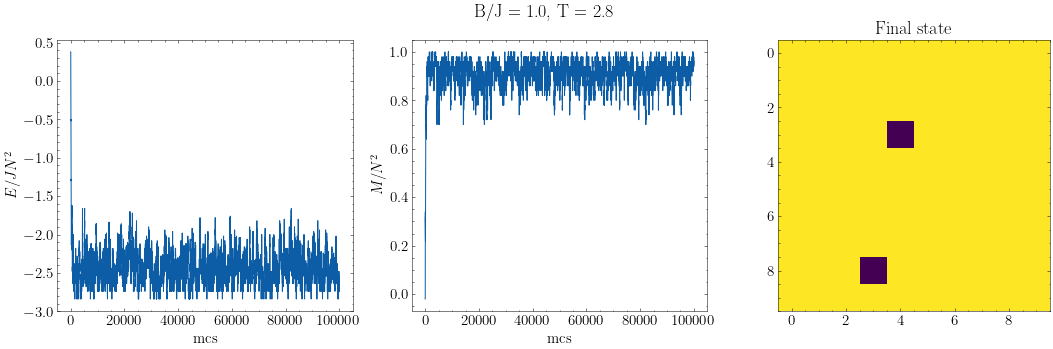

In [18]:
# 10x10 spins, random initial state, B = 1, T = 2.8, 100000 mcs

N = 10
T = 2.8
B = 1.0
s = np.random.choice([-1,+1], (N,N))
steps = 100000

E_array, s_array = metropolis(s, N, T, B, steps)

plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
plt.plot(E_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$E/JN^2$')

plt.subplot(1,3,2)
plt.plot(s_array/N**2)
plt.xlabel('mcs')
plt.ylabel('$M/N^2$')

plt.subplot(1,3,3)
plt.imshow(s)
plt.title('Final state')

plt.suptitle('B/J = 1.0, T = 2.8')

plt.show()

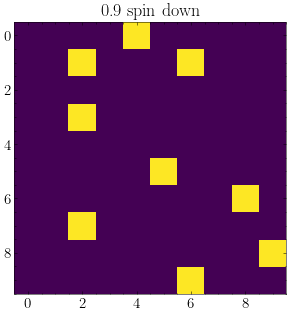

In [54]:
# Controlling the initial state

s = np.random.random(size=(N,N))
s[s > 0.9] = 1.0
s[s < 0.9] = 0.0

plt.imshow(s)
plt.title("0.9 spin down")
plt.show()

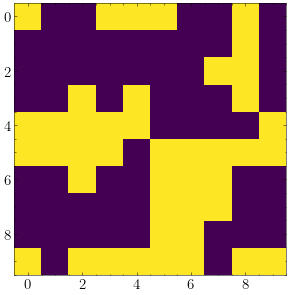

In [85]:
# Animation

N = 10
T = 1.8
s = np.random.choice([-1,+1], (N,N))
steps = 100

for mcs in range(steps):
    # Select a random spin
    i, j = np.random.randint(low=0, high=N, size=2)

    # Check energy difference  
    dE = calculate_dE(s, i, j)

    if dE <= 0:
        s[i,j] = -1*s[i,j]
    else:
        if np.random.random() < np.exp(-dE/T):
            s[i,j] = -1*s[i,j]
    
    plt.imshow(s)
    display.clear_output(wait=True)
    plt.show()

# Demon Algorithm